In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
#inspect
inspector = inspect(engine)
inspector.get_table_names()

[&#39;measurement&#39;, &#39;station&#39;]

In [7]:
# Use Inspector to print the column names and types
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [8]:
# Use Inspector to print the column names and types
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [9]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(engine, reflect=True)

In [10]:
# We can view all of the classes that automap found
Base.classes.keys()

[&#39;measurement&#39;, &#39;station&#39;]

In [11]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [12]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [13]:
engine.execute('SELECT * FROM Station LIMIT 5').fetchall()

[(1, &#39;USC00519397&#39;, &#39;WAIKIKI 717.2, HI US&#39;, 21.2716, -157.8168, 3.0),
 (2, &#39;USC00513117&#39;, &#39;KANEOHE 838.1, HI US&#39;, 21.4234, -157.8015, 14.6),
 (3, &#39;USC00514830&#39;, &#39;KUALOA RANCH HEADQUARTERS 886.9, HI US&#39;, 21.5213, -157.8374, 7.0),
 (4, &#39;USC00517948&#39;, &#39;PEARL CITY, HI US&#39;, 21.3934, -157.9751, 11.9),
 (5, &#39;USC00518838&#39;, &#39;UPPER WAHIAWA 874.3, HI US&#39;, 21.4992, -158.0111, 306.6)]

In [14]:
engine.execute('SELECT * FROM Measurement LIMIT 5').fetchall()


[(1, &#39;USC00519397&#39;, &#39;2010-01-01&#39;, 0.08, 65.0),
 (2, &#39;USC00519397&#39;, &#39;2010-01-02&#39;, 0.0, 63.0),
 (3, &#39;USC00519397&#39;, &#39;2010-01-03&#39;, 0.0, 74.0),
 (4, &#39;USC00519397&#39;, &#39;2010-01-04&#39;, 0.0, 76.0),
 (5, &#39;USC00519397&#39;, &#39;2010-01-06&#39;, None, 73.0)]

# Exploratory Climate Analysis

GOTTA WORK ON THIS

In [15]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
#last date
last_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(last_date)


(&#39;2017-08-23&#39;,)


In [16]:
#1 year before
one_year_ago = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print(one_year_ago)

2016-08-23


In [37]:
# Perform a query to retrieve the data and precipitation scores
precip = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= one_year_ago).\
    order_by(Measurement.date).all()
precip

 0.01),
 (&#39;2016-09-10&#39;, 0.14),
 (&#39;2016-09-10&#39;, 0.09),
 (&#39;2016-09-10&#39;, 1.16),
 (&#39;2016-09-11&#39;, 0.05),
 (&#39;2016-09-11&#39;, 0.18),
 (&#39;2016-09-11&#39;, 0.12),
 (&#39;2016-09-11&#39;, 0.3),
 (&#39;2016-09-11&#39;, 0.6),
 (&#39;2016-09-12&#39;, 0.0),
 (&#39;2016-09-12&#39;, 0.04),
 (&#39;2016-09-12&#39;, None),
 (&#39;2016-09-12&#39;, None),
 (&#39;2016-09-12&#39;, 0.15),
 (&#39;2016-09-12&#39;, 0.31),
 (&#39;2016-09-12&#39;, 1.04),
 (&#39;2016-09-13&#39;, 0.02),
 (&#39;2016-09-13&#39;, 0.37),
 (&#39;2016-09-13&#39;, 0.32),
 (&#39;2016-09-13&#39;, None),
 (&#39;2016-09-13&#39;, 0.46),
 (&#39;2016-09-13&#39;, 0.34),
 (&#39;2016-09-13&#39;, 1.2),
 (&#39;2016-09-14&#39;, 1.32),
 (&#39;2016-09-14&#39;, 0.9),
 (&#39;2016-09-14&#39;, 1.84),
 (&#39;2016-09-14&#39;, None),
 (&#39;2016-09-14&#39;, 1.19),
 (&#39;2016-09-14&#39;, 2.33),
 (&#39;2016-09-14&#39;, 6.7),
 (&#39;2016-09-15&#39;, 0.42),
 (&#39;2016-09-15&#39;, 0.12),
 (&#39;2016-09-15&#39;, 0.07),
 (&#39

In [42]:
# Save the query results as a Pandas DataFrame and set the index to the date column
precip_df = pd.DataFrame(precip, columns=['date', 'precipitation'])
precip_df.set_index('date', inplace=True)
precip_df = precip_df.dropna()

# Sort the dataframe by date
precip_df = precip_df.sort_values(by='date',ascending=True)
precip_df

,precipitation
date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,0.02
2016-08-23,1.79
...,...
2017-08-22,0.00
2017-08-23,0.00
2017-08-23,0.08


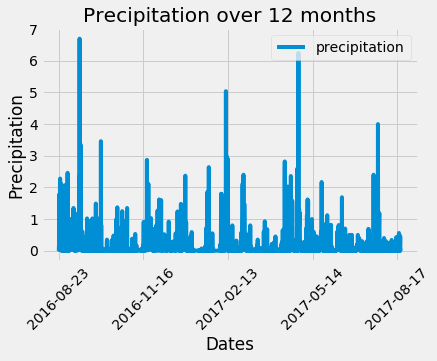

In [46]:
# Use Pandas Plotting with Matplotlib to plot the data
precip_df.plot(title="Precipitation over 12 months")
plt.legend(loc='upper right')
plt.xlabel('Dates')
plt.xticks(rotation = 45)
plt.ylabel('Precipitation')
plt.savefig("Images/Precipitation.png")
plt.show()

In [23]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precipitation_df.describe()

In [48]:
# Design a query to show how many stations are available in this dataset?
locations = session.query(Station)
print(locations.count())

9


In [52]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
active_stations = session.query(Measurement.station, func.count(Measurement.station)).\
        group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
active_stations_df = pd.DataFrame(active_stations, columns=['Station Name', 'Counts'])
active_stations_df

,Station Name,Counts
0,USC00519281,2772
1,USC00519397,2724
2,USC00513117,2709
3,USC00519523,2669
4,USC00516128,2612
5,USC00514830,2202
6,USC00511918,1979
7,USC00517948,1372
8,USC00518838,511


In [57]:
#Assign most active station to a variable
most_active_station=active_stations[0][0]
print(most_active_station)

USC00519281


In [60]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
highest_temp = session.query(func.max(Measurement.tobs)).filter(Measurement.station == most_active_station).all()
highest_temp

[(85.0)]

In [61]:
lowest_temp = session.query(func.min(Measurement.tobs)).filter(Measurement.station == most_active_station).all()
lowest_temp

[(54.0)]

In [62]:
average_temp = session.query(func.avg(Measurement.tobs)).filter(Measurement.station == most_active_station).all()
average_temp

[(71.66378066378067)]

In [69]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp = session.query(Measurement.date, Measurement.tobs).\
    filter(Measurement.station == most_active_station).filter(Measurement.date >= one_year_ago).\
    group_by(Measurement.date).all()

temp_df = pd.DataFrame(temp, columns=["date", "temperature"])
temp_df = temp_df.set_index('date')
temp_df

,temperature
date,
2016-08-23,77.0
2016-08-24,77.0
2016-08-25,80.0
2016-08-26,80.0
2016-08-27,75.0
...,...
2017-08-14,77.0
2017-08-15,77.0
2017-08-16,76.0


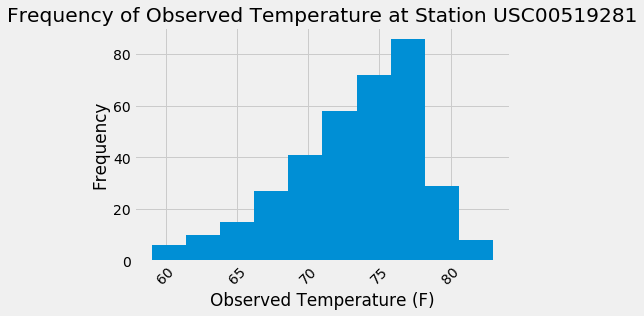

In [77]:
#plot on histogram
plt.hist(temp_df['temperature'])
plt.title(f"Frequency of Observed Temperature at Station {most_active_station}")
plt.xlabel('Observed Temperature (F)')
plt.xticks(rotation = 45)
plt.ylabel('Frequency')
plt.savefig("Images/Temperature.png")
plt.show()

## Bonus Challenge Assignment

In [28]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [29]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [30]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [31]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [32]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [33]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [34]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [35]:
# Plot the daily normals as an area plot with `stacked=False`
